<a href="https://colab.research.google.com/github/iamnileshmehta/Data-Analysis/blob/main/Telecom_Churn_Prediction_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/55ar5v2hnvy8cx3/datasets-255093-535845-churn-bigml-80.csv

--2023-10-18 18:16:41--  https://www.dropbox.com/s/55ar5v2hnvy8cx3/datasets-255093-535845-churn-bigml-80.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/55ar5v2hnvy8cx3/datasets-255093-535845-churn-bigml-80.csv [following]
--2023-10-18 18:16:42--  https://www.dropbox.com/s/raw/55ar5v2hnvy8cx3/datasets-255093-535845-churn-bigml-80.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9dc57669cf088c35778ca21c98.dl.dropboxusercontent.com/cd/0/inline/CF3d0nnQRHHBJvVl_2ldZBG_uoB0g0mGiyS0akP0unlL3_vucTDuxKqmBBR9psxKuNT4_a6UFtykqw_ZoMKZzuM6247IzAaWJliMXn8Pc0-WJkpLOcv-Yx1HbW9G6qYL0bZcOTGDaQmIGl2TwnjfQaPK/file# [following]
--2023-10-18 18:16:42--  https://uc9dc57669cf088c35778ca21c98.dl.dropboxusercontent.com/cd/0/inline/CF3d0nnQRHHBJvV

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/datasets-255093-535845-churn-bigml-80.csv')
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


In [ ]:
data.count()

State                     2666
Account length            2666
Area code                 2666
International plan        2666
Voice mail plan           2666
Number vmail messages     2666
Total day minutes         2666
Total day calls           2666
Total day charge          2666
Total eve minutes         2666
Total eve calls           2666
Total eve charge          2666
Total night minutes       2666
Total night calls         2666
Total night charge        2666
Total intl minutes        2666
Total intl calls          2666
Total intl charge         2666
Customer service calls    2666
Churn                     2666
dtype: int64

In [ ]:
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

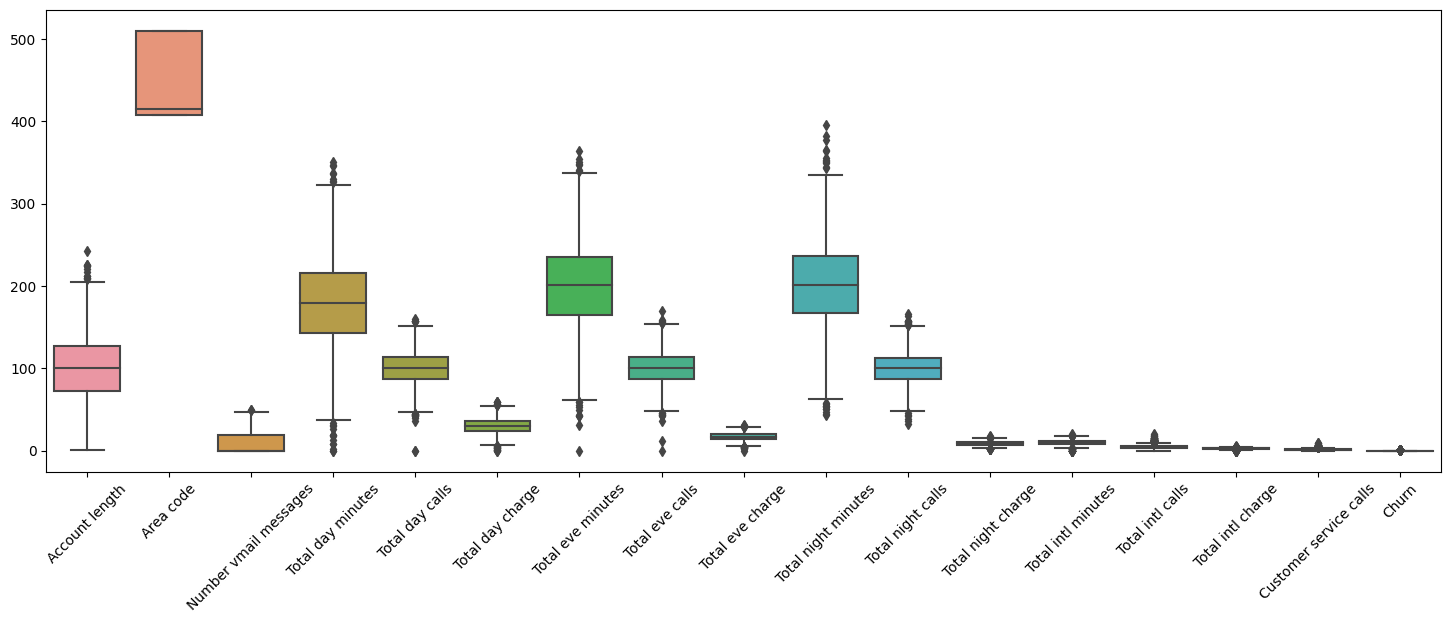

In [ ]:
plt.figure(figsize=(18,6))
sns.boxplot(data)
plt.xticks(rotation=45)
plt.show()

- From data we can understand all values are available in dataset are realastic, and uses can be zero min and it can be more than 400 min.

<ipython-input-24-f933c9d10f1c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

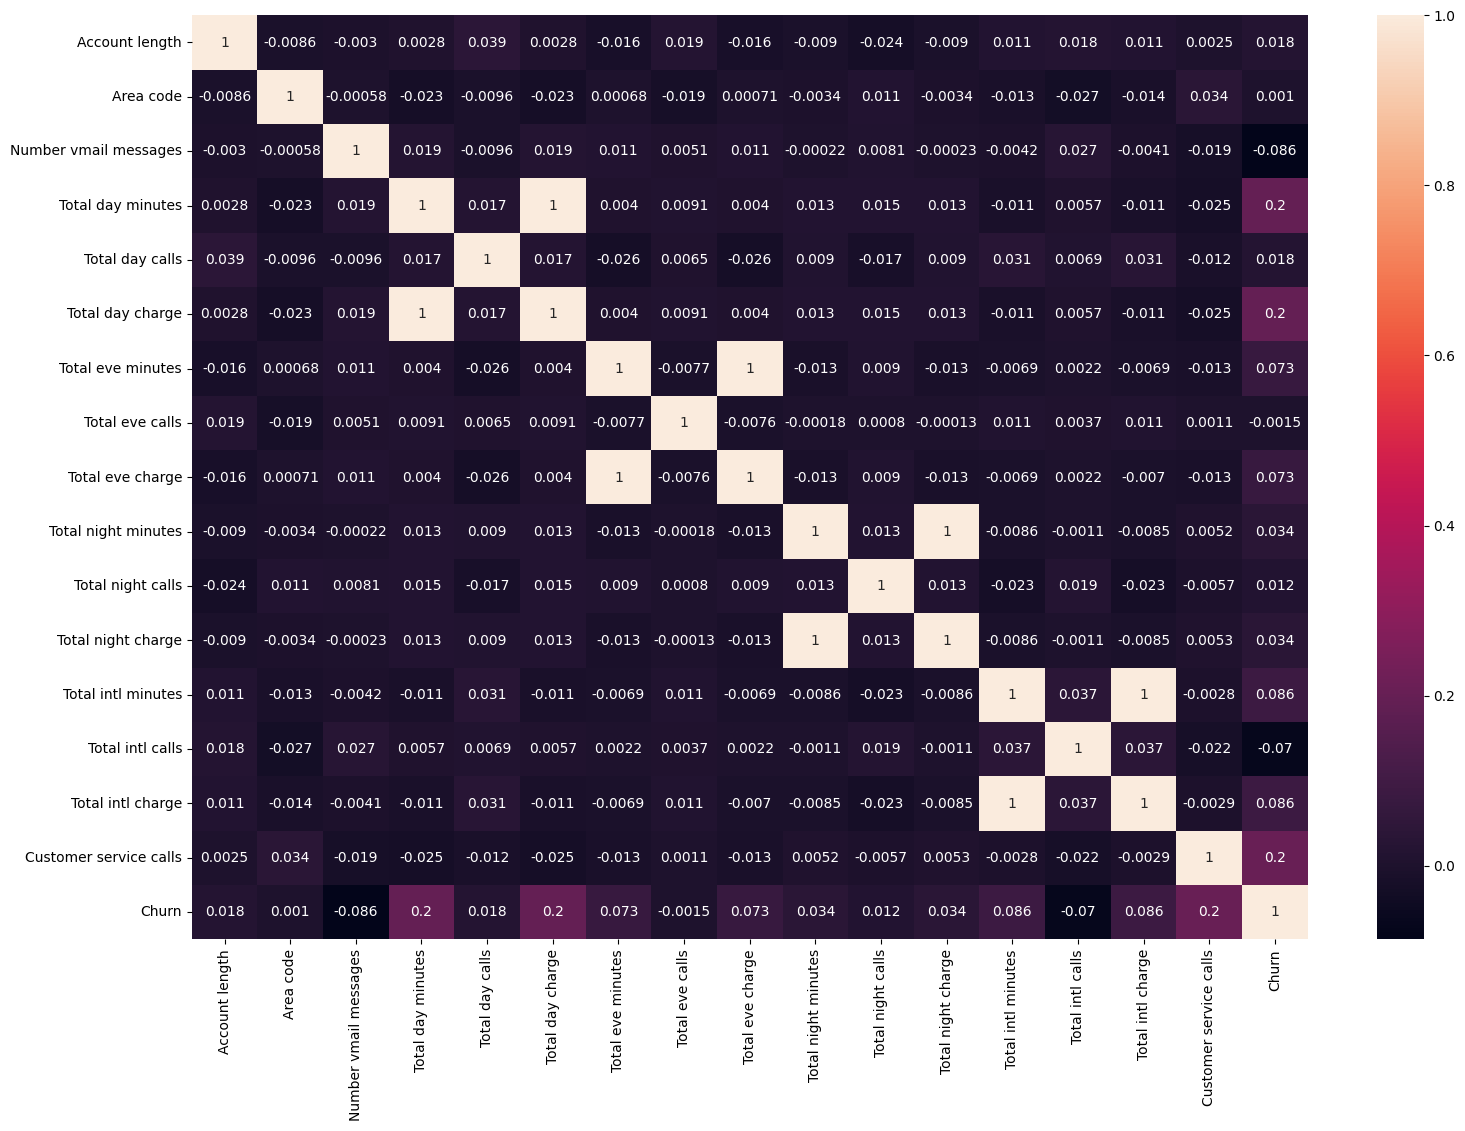

In [ ]:
correlation = data.corr()
plt.figure(figsize=(18,12))
sns.heatmap(correlation, annot=True)

- Total calls and total charges are highly correlated to each other. It means we can see that service provider charging 1 paisa/per min.
